## Step 1 : Importing the dependencies
At the beginning we need to import some of the libraries so that it becomes easy for us to explore and manipulate the data stored in the dataset , thus for this purpose at the start , we will be importing pandas library for playing with the data stored in the dataset, numpy library for doing the linear algebra work , matplotlib and seaborn library for the visualizations purpose 

In [1]:
# Importing the dependencis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [2]:
# Reading the data using read_csv method
df = pd.read_csv('ds_salaries.csv')

## Step 2 : Exploratory data analysis ( Phase 1 )


In [3]:
# Checking the shape of the dataset
df.shape

(607, 12)

In [4]:
# Checking any random 5 rows from the dataset
df.sample(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
552,552,2022,SE,FT,Data Scientist,176000,USD,176000,US,100,US,M
104,104,2021,MI,FT,Data Scientist,73000,USD,73000,US,0,US,L
470,470,2022,MI,FT,Data Analyst,135000,USD,135000,US,100,US,M
460,460,2022,MI,FT,Machine Learning Infrastructure Engineer,53000,EUR,58255,PT,50,PT,L
286,286,2021,SE,FT,Head of Data,87000,EUR,102839,SI,100,SI,L


In [5]:
# Checking the datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
# Checking any null values
df.isnull().mean()*100

Unnamed: 0            0.0
work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

In [7]:
# Let's check any duplicated values
df.duplicated().sum()

0

In [8]:
# Descritive statistical information about the dataset
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


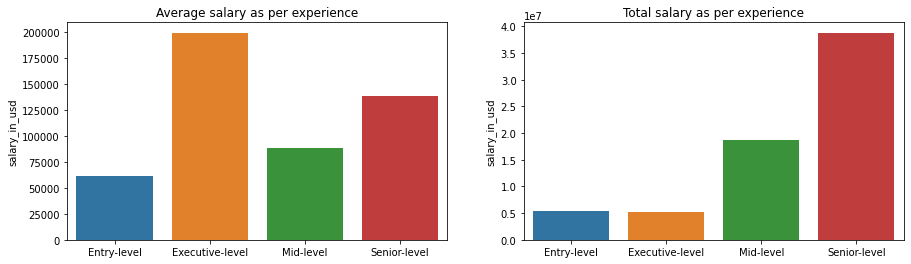

In [9]:
# Salary as per the exerience
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

salary_exp_mean = df.groupby('experience_level')['salary_in_usd'].mean()
exp_level_index = ['Entry-level','Executive-level','Mid-level','Senior-level']
sns.barplot(x = exp_level_index , y = salary_exp_mean,ax = ax[0])
ax[0].set(title='Average salary as per experience')

salary_exp_sum = df.groupby('experience_level')['salary_in_usd'].sum()
sns.barplot(x = exp_level_index , y = salary_exp_sum,ax = ax[1])
ax[1].set(title='Total salary as per experience')

plt.show()

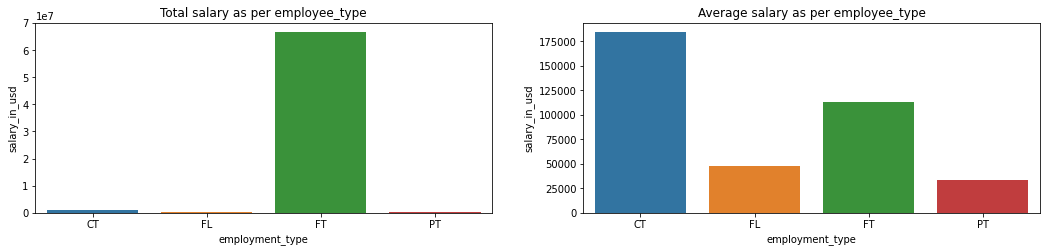

In [10]:
# Salary as per the exerience : PT Part-time FT Full-time CT Contract FL Freelance
fig, ax = plt.subplots(1, 2, figsize=(18, 3.5))

salary_emp = df.groupby('employment_type')['salary_in_usd'].sum()
sns.barplot(x = salary_emp.index , y = salary_emp,ax = ax[0]).set(title='Total salary as per employee_type')

salary_emp = df.groupby('employment_type')['salary_in_usd'].mean()
sns.barplot(x = salary_emp.index , y = salary_emp,ax = ax[1]).set(title='Average salary as per employee_type')
plt.show()

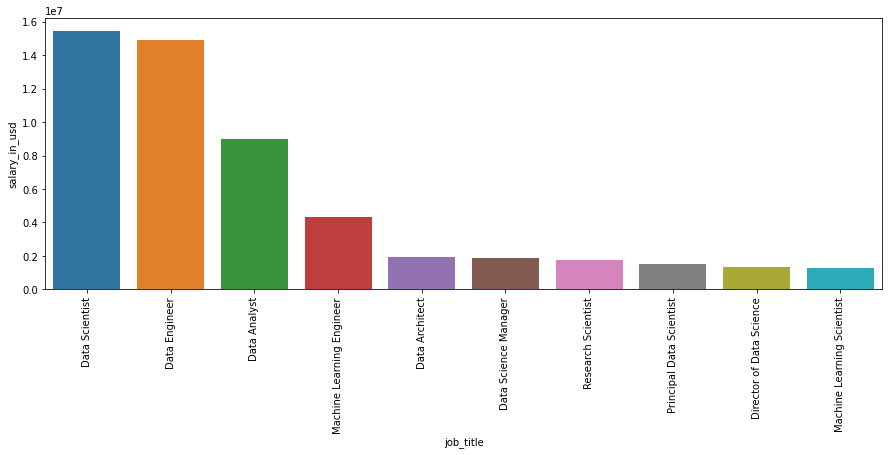

In [11]:
# Let's see which job title gets most salary
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

most_salary = df.groupby('job_title')['salary_in_usd'].sum()
most_salary = most_salary.sort_values(ascending=False)
sns.barplot(x = most_salary[:10].index, y = most_salary[:10])
plt.xticks(rotation= 'vertical')
plt.show()

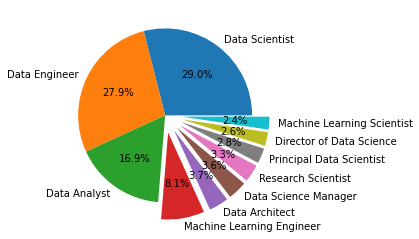

In [12]:
# let's plot to pie chart for more clear observation
ex = [0,0,0,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
plt.pie(most_salary[:10],labels = most_salary[:10].index,autopct='%1.1f%%',explode = ex)
plt.show()

# Data cleaning 

In [13]:
# Dropping some unnecessay columns from the dataframe
df.drop(['Unnamed: 0','salary','salary_currency'],axis=1,inplace=True)

In [14]:
# Let's optimize the memory by using appropriate data types
int_cols = df.select_dtypes(include=np.int64)
df[int_cols.columns] = df[int_cols.columns].astype(np.int32)

float_cols = df.select_dtypes(include=np.float64)
df[float_cols.columns] = df[float_cols.columns].astype(np.float32)

To detect outliers in categorical data, you can use techniques such as chi-square testing to compare the observed frequency of each category with the expected frequency. If the difference between the observed and expected frequencies is large, it may indicate the presence of an outlier. Alternatively, you can visualize the distribution of the categorical data using techniques such as bar plots or pie charts to visually identify any data points that fall outside of the expected distribution.

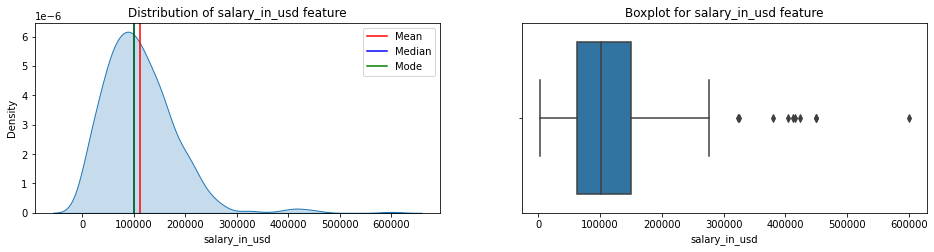

In [15]:
fig,ax = plt.subplots(1,2,figsize = (16,3.5))

# Let's visualize the shape of distribution of salary_in_usd feature
sns.kdeplot(x = df['salary_in_usd'],shade=True,ax = ax[0]).set(title='Distribution of salary_in_usd feature')
ax[0].axvline(df['salary_in_usd'].mean(),color='red',label='Mean')
ax[0].axvline(df['salary_in_usd'].median(),color='blue',label='Median')
ax[0].axvline(df['salary_in_usd'].mode().values[0],color='green',label='Mode')
ax[0].legend()

# Let's visualize outliers
sns.boxplot(x = df['salary_in_usd'],ax = ax[1]).set(title='Boxplot for salary_in_usd feature')
plt.show()

In [19]:
# let's create a copy of the salary_in_usd feature so that we could compare the change in distribution 
cap = df['salary_in_usd'].copy()
remove = df['salary_in_usd'].copy()

In [17]:
# Function to find inter-quartile range
def find_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3-q1
    Upper_lmt = q3 + (1.5*IQR)
    Lower_lmt = q1 - (1.5*IQR)
    return [Upper_lmt,Lower_lmt]

In [20]:
lmts = find_iqr(df['salary_in_usd'])

# Let's remove the outliers
remove = remove[remove<lmts[0]]

# Let's cap the outliers
cap = np.where(cap<lmts[1],lmts[1],
                  np.where(cap>lmts[0],lmts[0],cap))

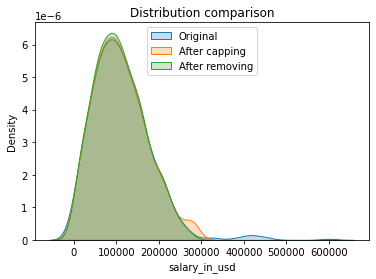

In [26]:
# Now let's check the change in the shape of the distribution both after removing or capping

sns.kdeplot(x = df['salary_in_usd'],shade=True,label = 'Original').legend(loc='upper center')
sns.kdeplot(x = cap,shade=True,label = 'After capping').legend(loc='upper center')
sns.kdeplot(x = remove,shade=True,label = 'After removing').legend(loc='upper center')
plt.title('Distribution comparison')
plt.show()

In [13]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M


Since there are a lot of countries thus we willcluster the countries you provided in terms of continents. Here is how they would be grouped:

- North America: US, CA
- Europe: DE, GB, FR, GR, ES, LU, MD, IE, BE
- Asia: IN, TR, JP, PK, AE
- Africa: VN, KE
- South America: CH, CL
- Oceania: AS, DK

In [14]:
new_location = []

north_america = ['US', 'CA']
europe = ['DE', 'GB', 'FR', 'GR', 'ES', 'LU', 'MD', 'IE', 'BE']
asia = ['IN', 'TR', 'JP', 'PK', 'AE']
africa = ['VN', 'KE']
south_america = ['CH', 'CL']
oceania = ['AS', 'DK']

for area in df['company_location']:
    if area in north_america:
        new_location.append('North-America')
    elif area in europe:
        new_location.append('Europe')
    elif area in asia:
        new_location.append('Asia')
    elif area in africa:
        new_location.append('Africa')
    elif area in south_america:
        new_location.append('South-America')
    elif area in oceania:
        new_location.append('Oceania')
        
new_location = pd.Series(new_location)
df['Company_loc'] = new_location
df = df.drop(['company_location'],axis=1)

In [16]:
# fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# salary_comploc = df.groupby('Company_loc')['salary_in_usd'].sum()
# sns.barplot(x = salary_comploc.index, y = salary_comploc,ax = ax[0])

# salary_comploc = df.groupby('Company_loc')['salary_in_usd'].sum()
# sns.barplot(x = salary_comploc[['Africa','Asia','Europe','Oceania','South-America']].index,
#             y = salary_comploc[['Africa','Asia','Europe','Oceania','South-America']],ax = ax[1])

In [17]:
check = df['employee_residence'].value_counts()
check.index

Index(['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR', 'JP', 'PT', 'BR', 'PK',
       'NL', 'PL', 'IT', 'RU', 'AE', 'AT', 'VN', 'TR', 'AU', 'RO', 'BE', 'SG',
       'SI', 'DK', 'HU', 'NG', 'MX', 'BO', 'MY', 'TN', 'IE', 'DZ', 'AR', 'CZ',
       'JE', 'LU', 'PR', 'RS', 'EE', 'CL', 'HK', 'KE', 'MD', 'CO', 'IR', 'CN',
       'MT', 'UA', 'IQ', 'HN', 'BG', 'HR', 'PH', 'NZ', 'CH'],
      dtype='object')

country_list = ["United States", "United Kingdom", "India", "Canada", "Germany", "France",
                "Spain", "Greece", "Japan", "Portugal", "Brazil", "Pakistan", "Netherlands",
                "Poland", "Italy", "Russia", "United Arab Emirates", "Austria", "Vietnam",
                "Turkey", "Australia", "Romania", "Belgium", "Singapore", "Slovenia", "Denmark",
                "Hungary", "Nigeria", "Mexico", "Bolivia", "Malaysia", "Tunisia", "Ireland",
                "Algeria", "Argentina", "Czech Republic", "Jersey", "Luxembourg", "Puerto Rico",
                "Serbia", "Estonia", "Chile", "Hong Kong", "Kenya", "Moldova", "Colombia",
                "Iran", "China", "Malta", "Ukraine", "Iraq", "Honduras", "Bulgaria", "Croatia",
                "Philippines", "New Zealand", "Switzerland"]

In [18]:
new_emp_location = []

north_america = ['US', 'CA']
europe = ['GB', 'DE', 'FR', 'ES', 'GR', 'PT', 'NL', 'PL', 'IT', 'RU', 'AE', 'AT', 'BE', 'SG', 'SI', 'DK', 'HU', 'RO', 'JE', 'LU', 'PR', 'RS', 'EE']
asia = ['IN', 'JP', 'VN', 'TR', 'MY', 'HK', 'CN', 'MT', 'UA', 'IQ', 'BG', 'HR', 'PH', 'CH']
africa = ['PK', 'NG', 'MX', 'BO', 'TN', 'DZ', 'KE', 'MD', 'CO', 'IR', 'HN']
oceania = ['AU', 'NZ']


for area in df['employee_residence']:
    if area in africa:
        new_emp_location.append('Africa')
    elif area in asia:
        new_emp_location.append('Asia')
    elif area in europe:
        new_emp_location.append('Europe')
    elif area in north_america:
        new_emp_location.append('North_America')
    elif area in oceania:
        new_emp_location.append('Oceania')
        
new_emp_location = pd.Series(new_emp_location)
df['Employee_loc'] = new_emp_location
df = df.drop(['employee_residence'],axis=1)

In [19]:
'''EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / 
Expert EX Executive-level / Director'''

'EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / \nExpert EX Executive-level / Director'

In [20]:
map_comp_size = {'L':2,'S':0,'M':1}
map_exp_level = {'EN':0,'MI':1,'SE':2,'EX':3}

df['experience_level'] = df['experience_level'].map(map_exp_level)
df['company_size'] = df['company_size'].map(map_comp_size)

In [21]:
df = pd.get_dummies(df,columns = ['Company_loc','Employee_loc','employment_type'],drop_first=True)

In [37]:
# Try to reduce the categories
check = df['job_title'].value_counts()
check.values

array([143, 132,  97,  41,  16,  12,  11,   8,   8,   7,   7,   7,   7,
         7,   6,   6,   6,   6,   5,   5,   5,   5,   4,   4,   4,   4,
         3,   3,   3,   3,   3,   3,   3,   2,   2,   2,   2,   2,   2,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=int64)

<AxesSubplot:>

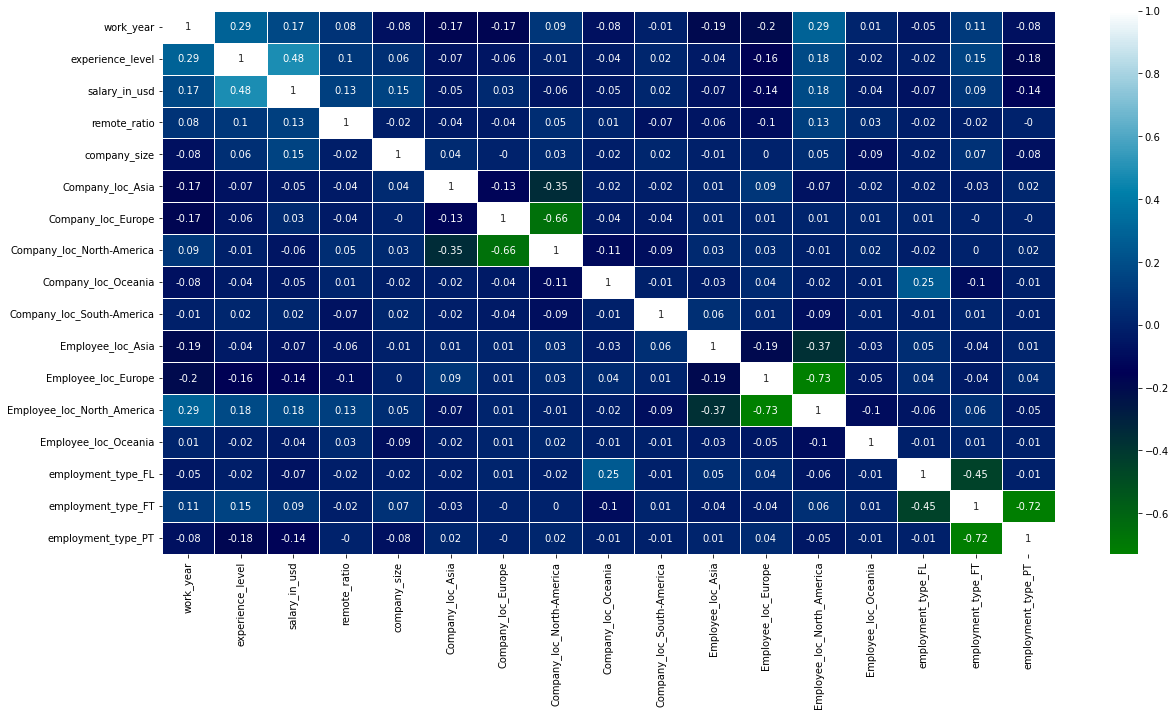

In [38]:
fig, ax = plt.subplots(figsize=(20,10))      
sns.heatmap(round(df.corr(),2), annot=True, linewidths=1, ax=ax,cmap='ocean')